# 1. 데이터 로드

### 주요 import 할것들 미리 해두기 (나머지는 그때그때)

In [1]:
import os
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime as dt
from datetime import timedelta as td

In [2]:
import utils

### 경로 등 global config 설정

In [3]:
RAW_ROOT = 'raw'
DATA_ROOT = 'data'

### 원본 데이터 불러오기

In [4]:
%%time
df_user_raw, df_item_raw, df_log_raw, df_sub_raw = utils.load_raw(RAW_ROOT)

CPU times: user 15.8 s, sys: 7.96 s, total: 23.7 s
Wall time: 22.3 s


---

# 2. 아이템 데이터 분석

### 데이터 확인

In [5]:
df_item_raw

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,0108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,0108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,0108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,0110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,0110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105537,0953450001,953450,5pk regular Placement1,302,Socks,Socks & Tights,1010014,Placement print,9,Black,...,Socks Bin,F,Menswear,3,Menswear,26,Men Underwear,1021,Socks and Tights,Socks in a fine-knit cotton blend with a small...
105538,0953763001,953763,SPORT Malaga tank,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey,A,Ladieswear,1,Ladieswear,2,H&M+,1005,Jersey Fancy,Loose-fitting sports vest top in ribbed fast-d...
105539,0956217002,956217,Cartwheel dress,265,Dress,Garment Full body,1010016,Solid,9,Black,...,Jersey,A,Ladieswear,1,Ladieswear,18,Womens Trend,1005,Jersey Fancy,"Short, A-line dress in jersey with a round nec..."
105540,0957375001,957375,CLAIRE HAIR CLAW,72,Hair clip,Accessories,1010016,Solid,9,Black,...,Small Accessories,D,Divided,2,Divided,52,Divided Accessories,1019,Accessories,Large plastic hair claw.


### NaN 체크

In [6]:
df_item_raw.isna().sum()

article_id                        0
product_code                      0
prod_name                         0
product_type_no                   0
product_type_name                 0
product_group_name                0
graphical_appearance_no           0
graphical_appearance_name         0
colour_group_code                 0
colour_group_name                 0
perceived_colour_value_id         0
perceived_colour_value_name       0
perceived_colour_master_id        0
perceived_colour_master_name      0
department_no                     0
department_name                   0
index_code                        0
index_name                        0
index_group_no                    0
index_group_name                  0
section_no                        0
section_name                      0
garment_group_no                  0
garment_group_name                0
detail_desc                     416
dtype: int64

### unique 체크

In [7]:
df_item_raw.nunique()

article_id                      105542
product_code                     47224
prod_name                        45875
product_type_no                    132
product_type_name                  131
product_group_name                  19
graphical_appearance_no             30
graphical_appearance_name           30
colour_group_code                   50
colour_group_name                   50
perceived_colour_value_id            8
perceived_colour_value_name          8
perceived_colour_master_id          20
perceived_colour_master_name        20
department_no                      299
department_name                    250
index_code                          10
index_name                          10
index_group_no                       5
index_group_name                     5
section_no                          57
section_name                        56
garment_group_no                    21
garment_group_name                  21
detail_desc                      43404
dtype: int64

### 분포 하나씩 살펴보기

In [8]:
fields = [
    'product_type_name',
    'graphical_appearance_name',
    'colour_group_name',
    'perceived_colour_value_name',
    'perceived_colour_master_name',
    'department_name',
    'index_name',
    'section_name',
    'garment_group_name',
    'product_group_name',
]

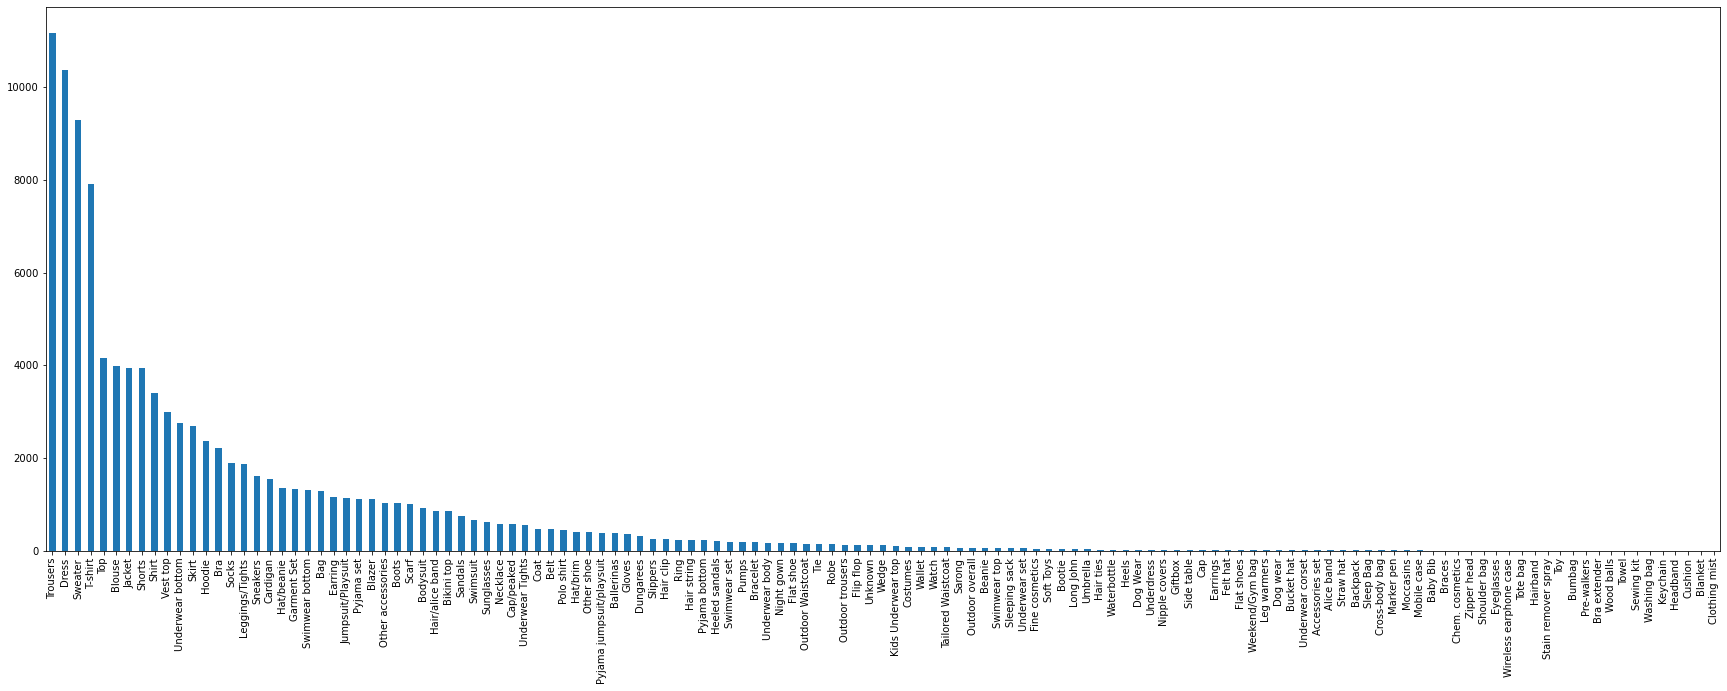

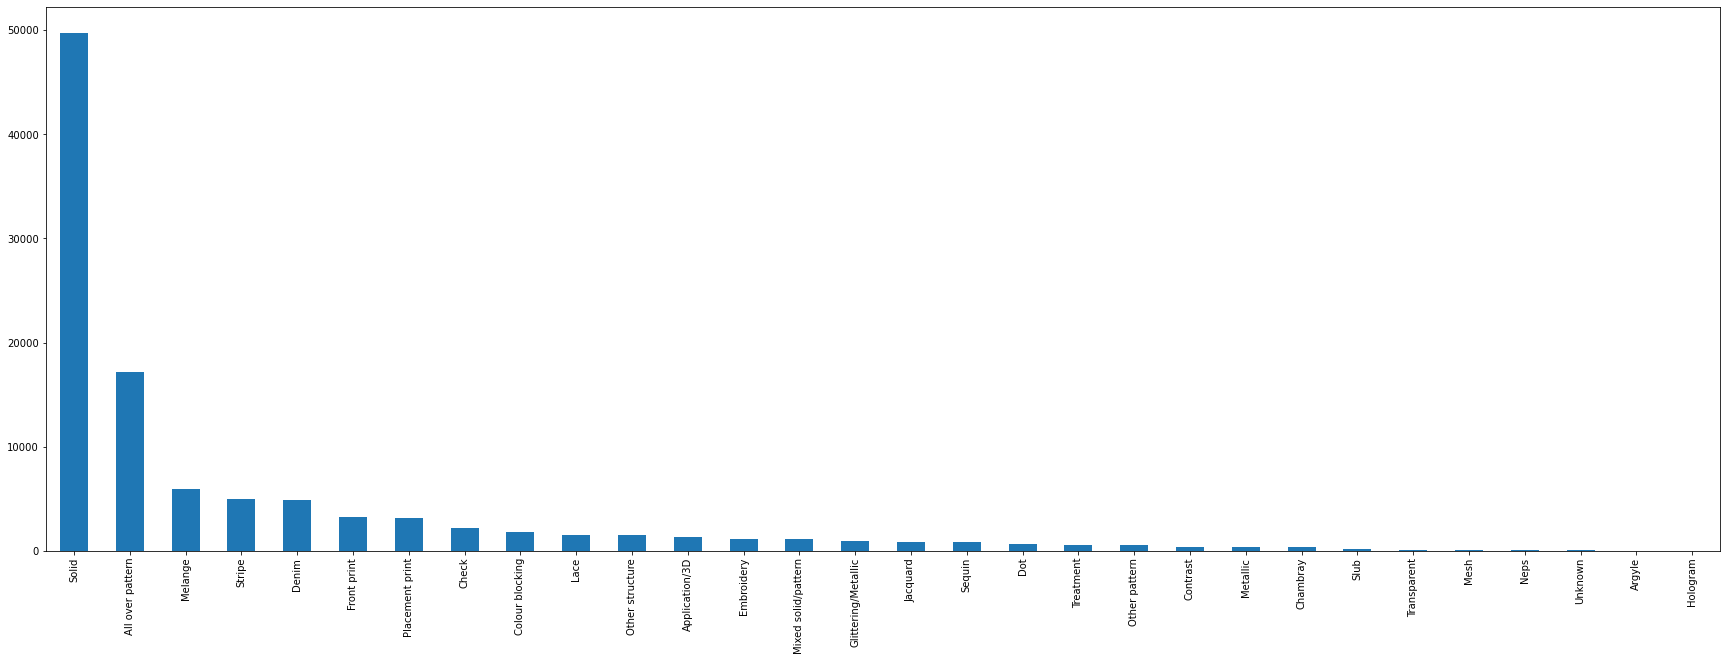

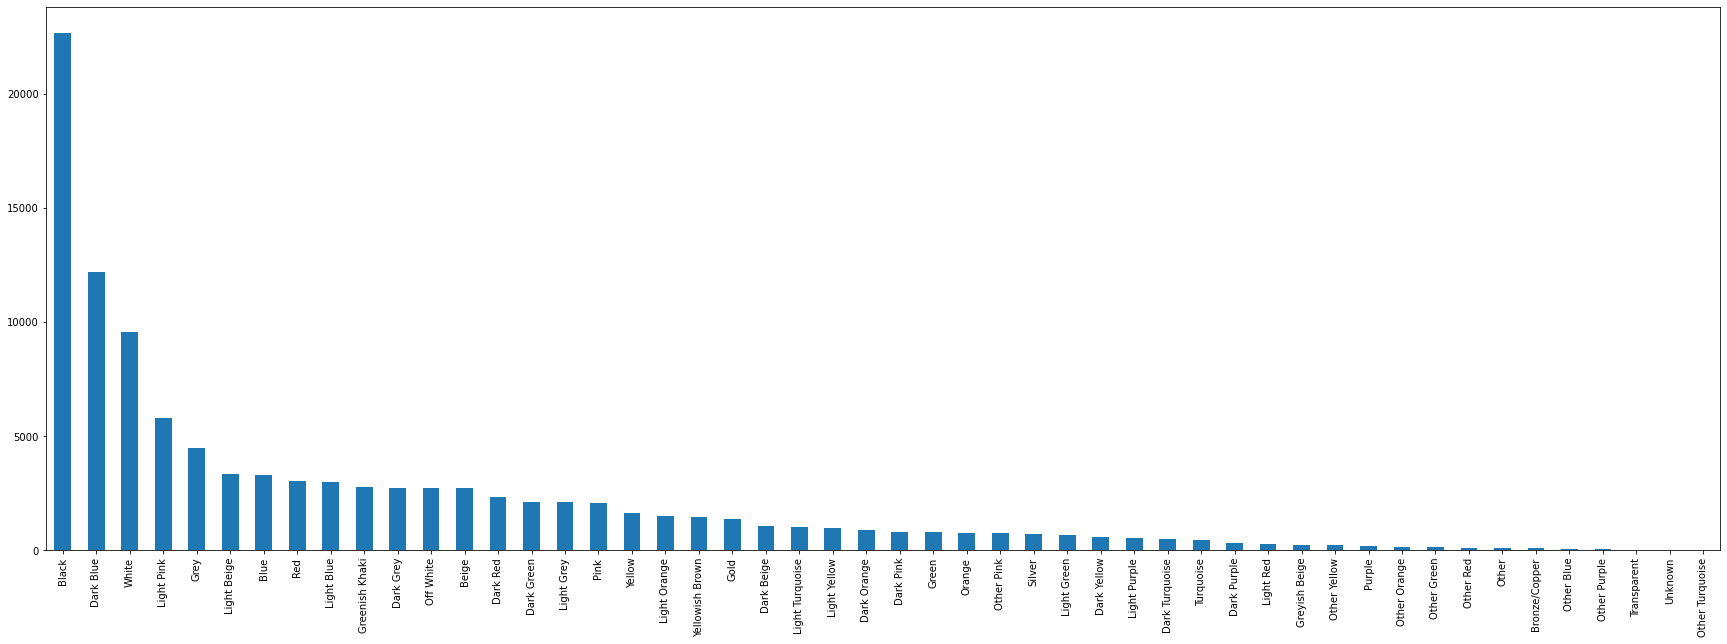

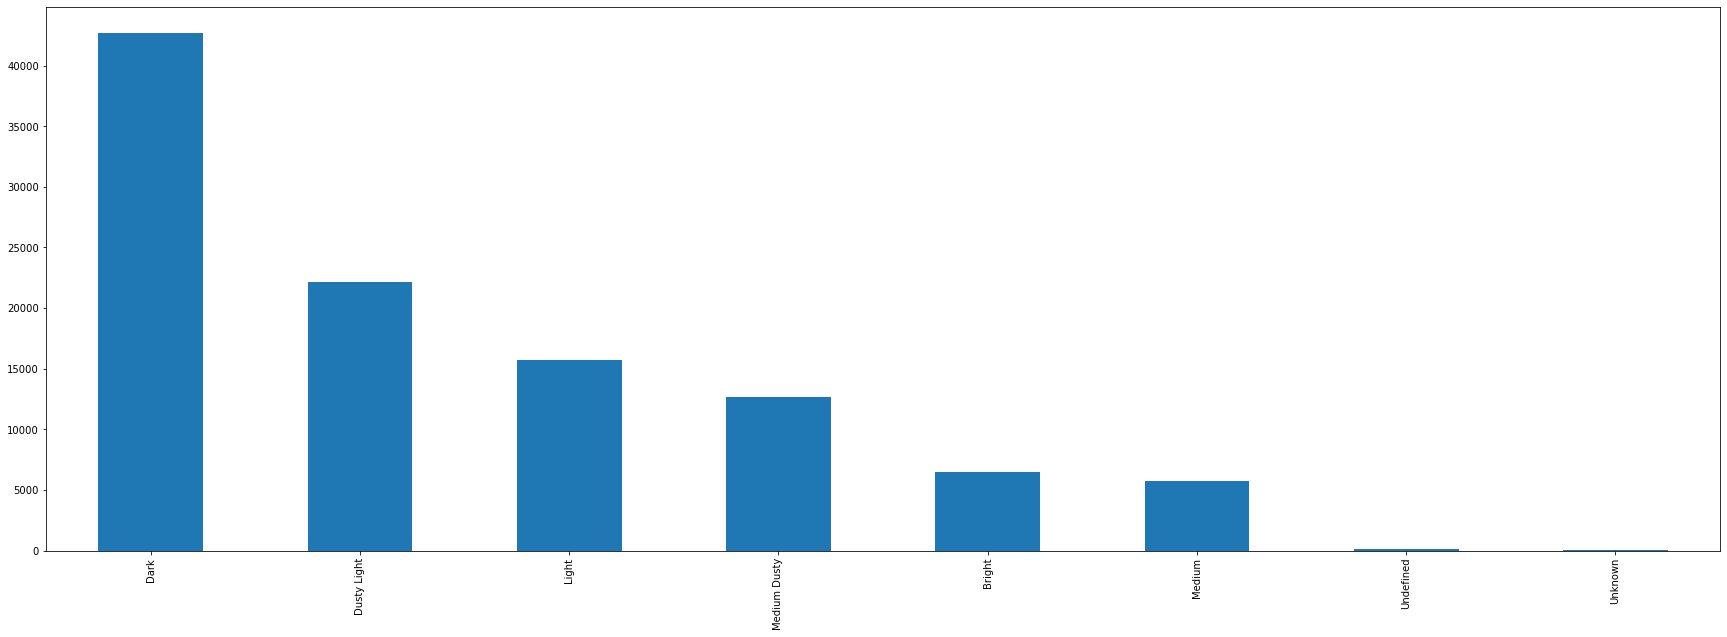

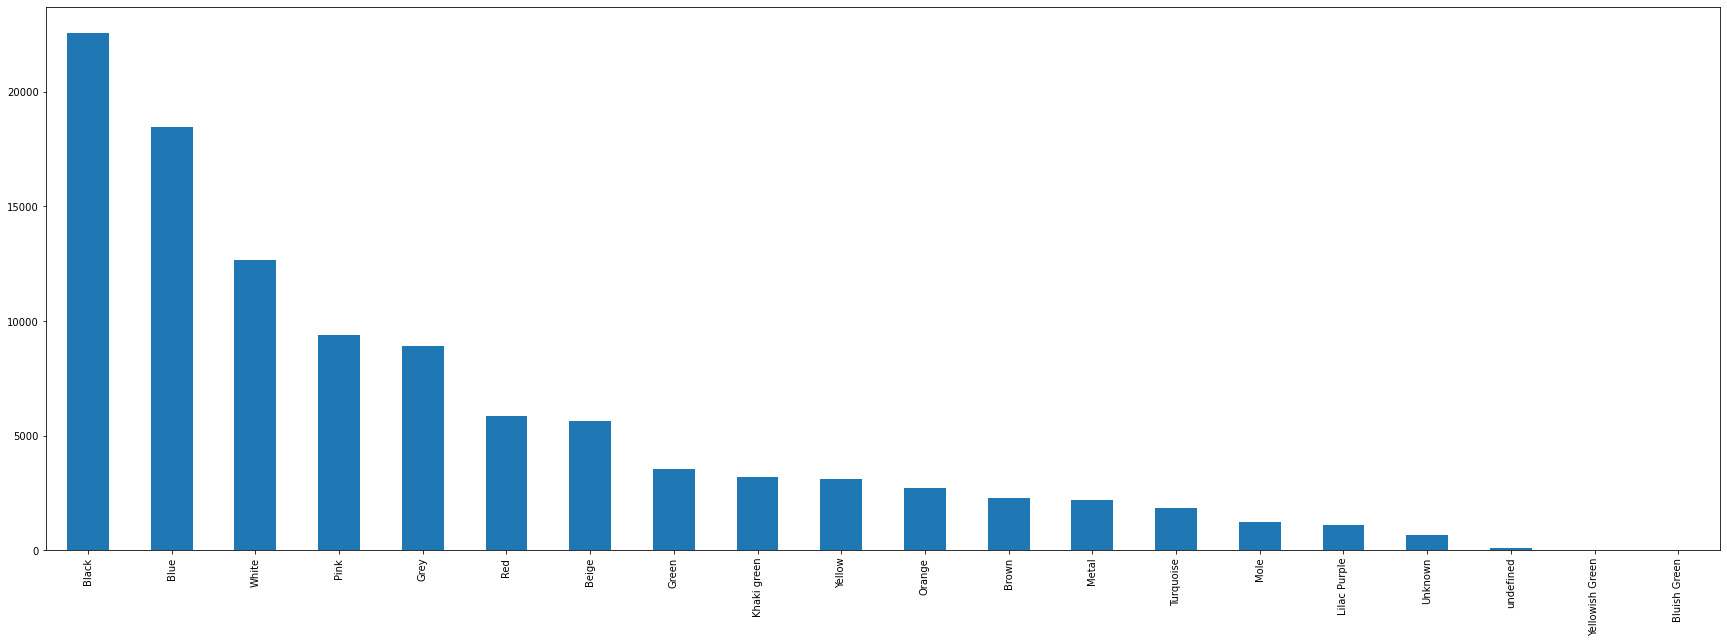

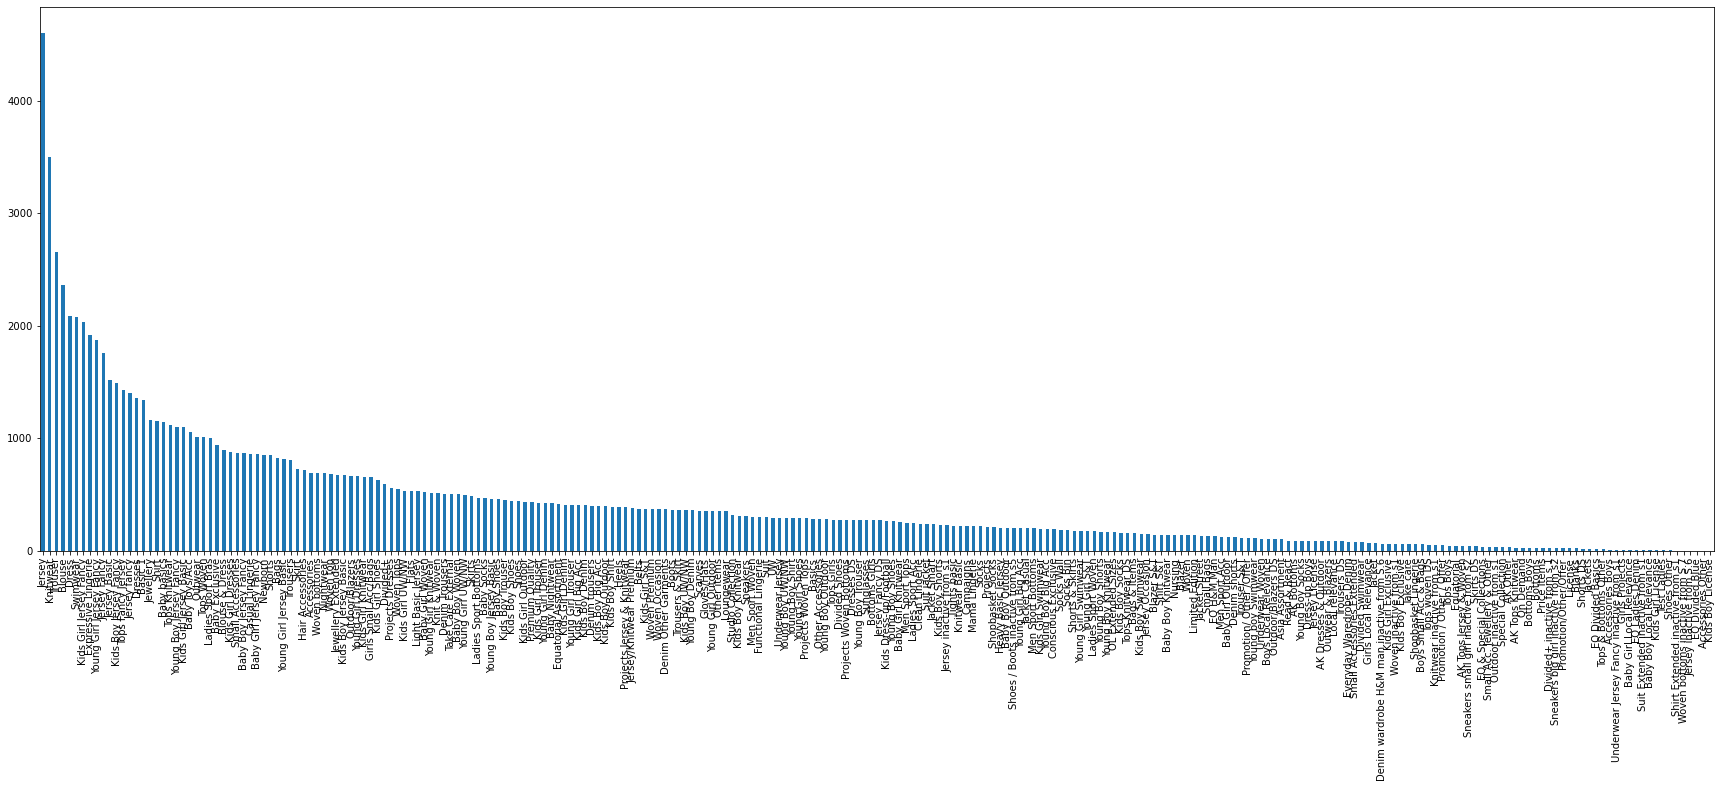

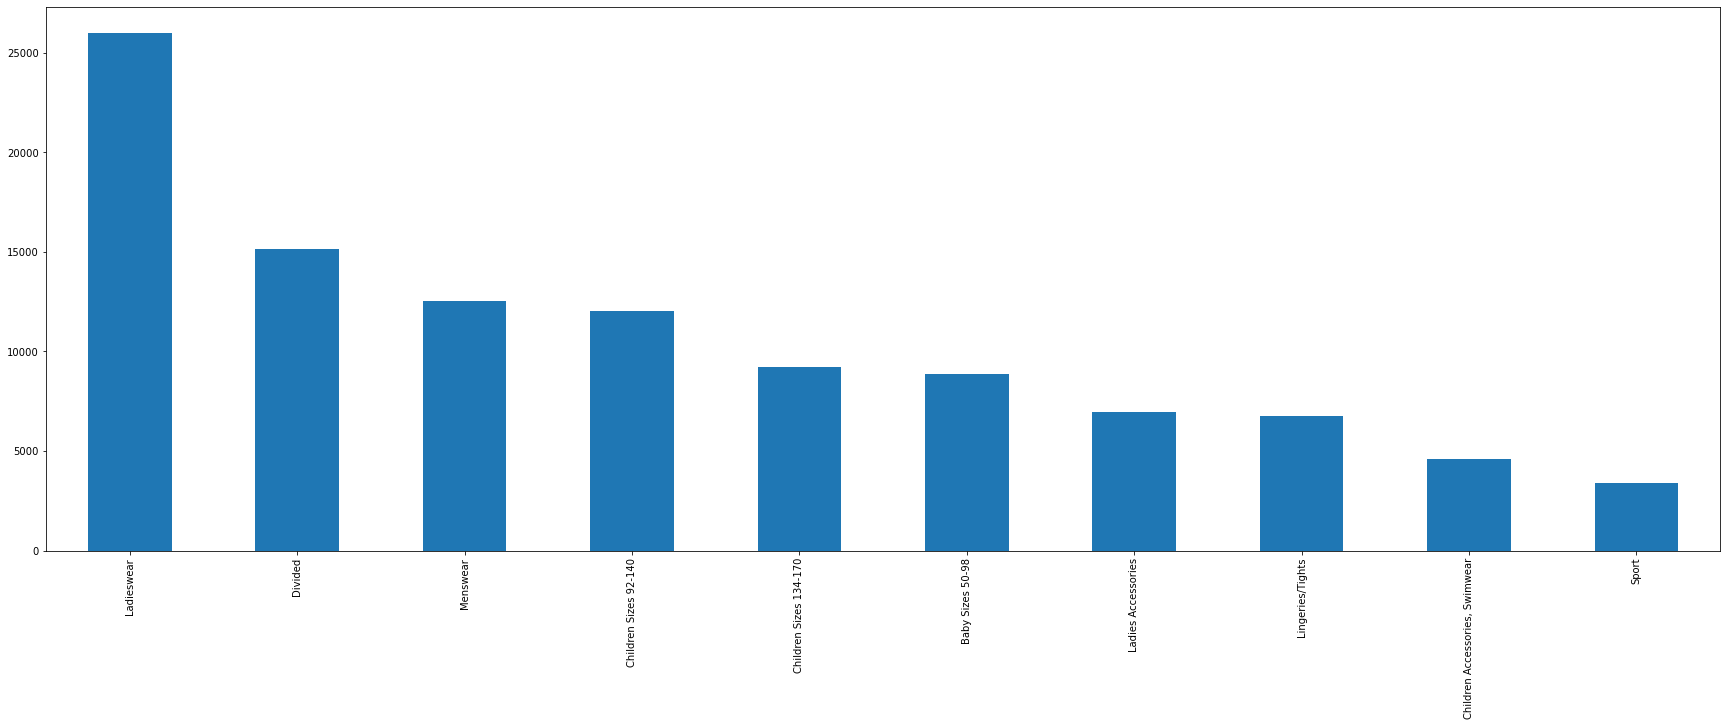

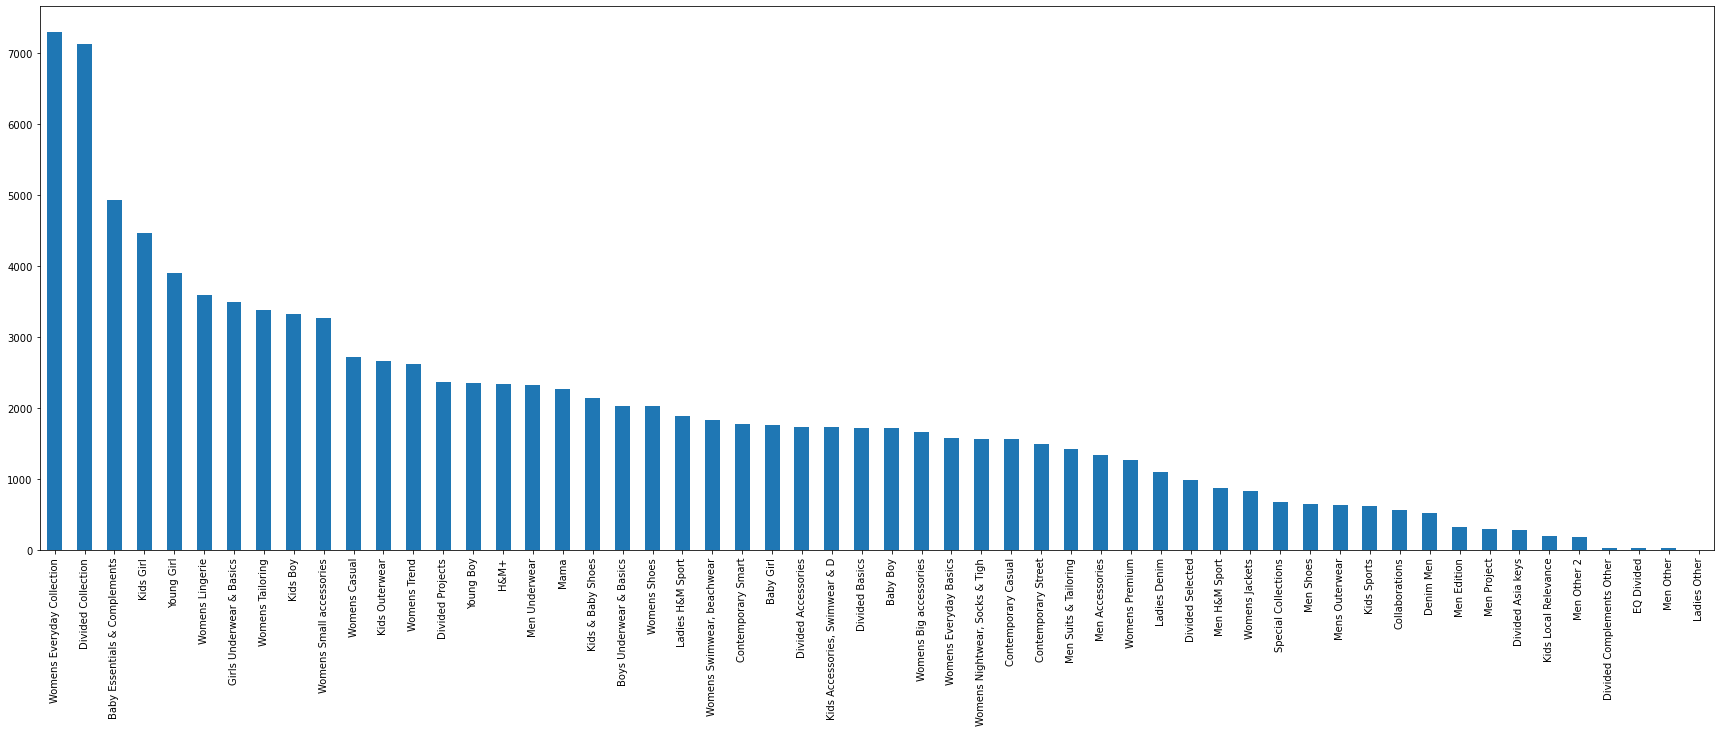

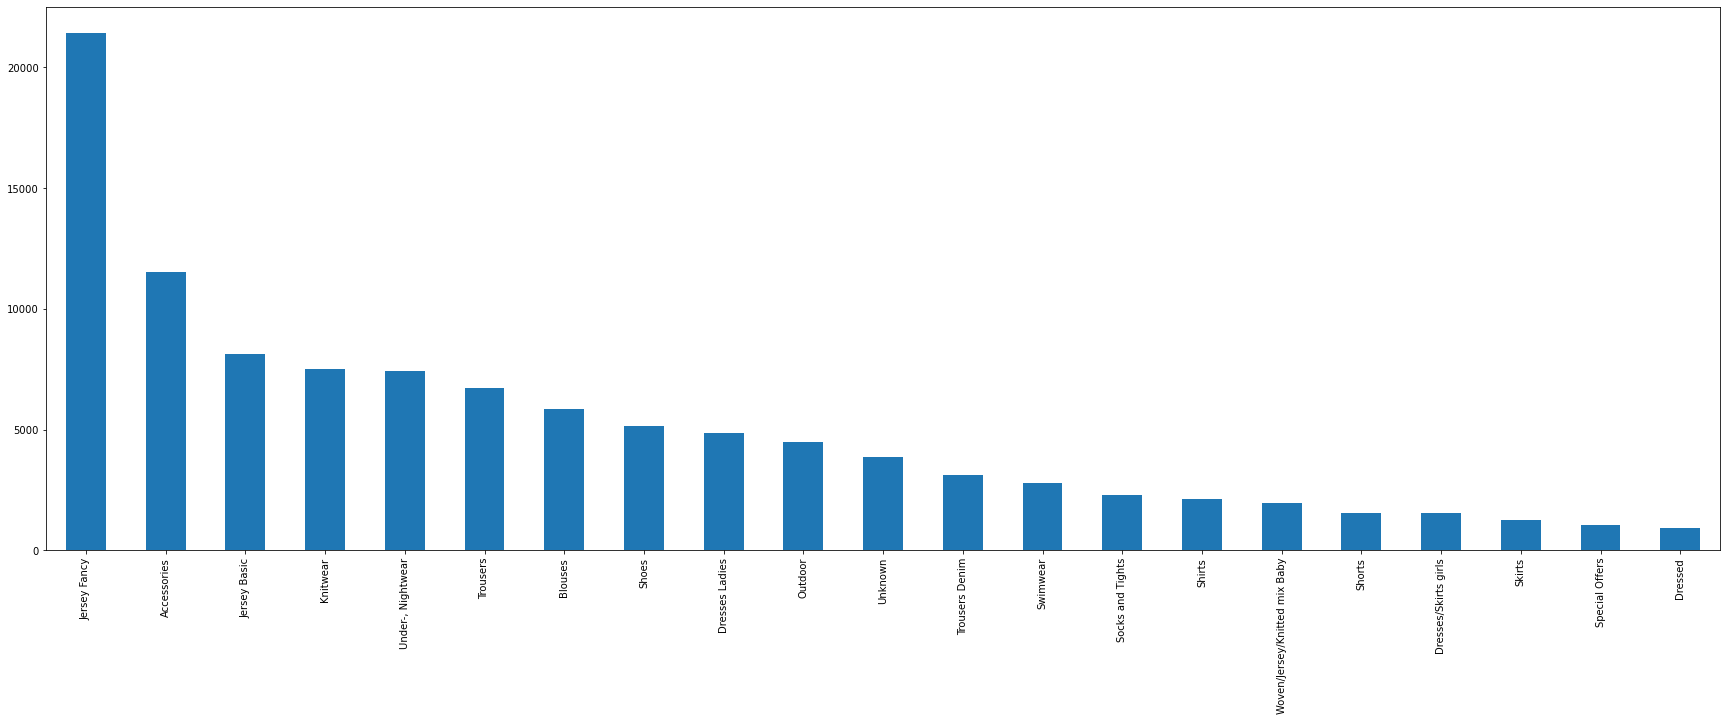

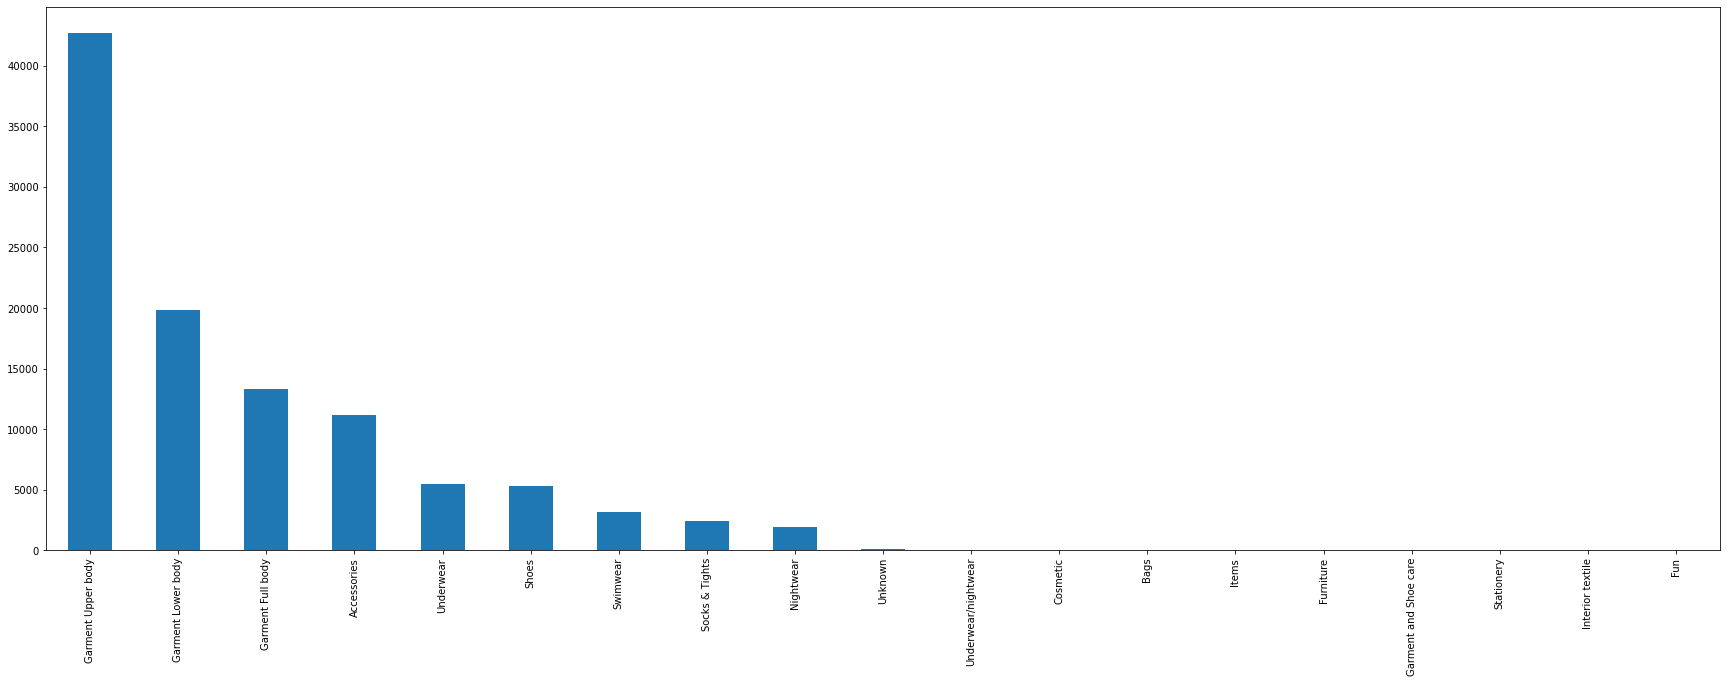

In [9]:
import matplotlib.pyplot as plt

for field in fields:
    df_item_raw[field].value_counts().plot(kind='bar', figsize=(30, 10))
    plt.show()

---

# 3. 아이템 기본 전처리

In [10]:
df_item = df_item_raw.copy()

### 나중을 위해서 인덱스 걸기

In [11]:
df_item.set_index('article_id', inplace=True)

### no 없는 필드 처리

In [12]:
product_group_name_map = {}
for index, name in enumerate(list(df_item['product_group_name'].unique())):
    product_group_name_map[name] = index
product_group_name_map['Unknown'] = -1

In [13]:
df_item['product_group_no'] = df_item['product_group_name'].map(product_group_name_map)

### no-name map

In [14]:
field_pairs = [
    ('product_type_no', 'product_type_name'),
    ('graphical_appearance_no', 'graphical_appearance_name'),
    ('colour_group_code', 'colour_group_name'),
    ('perceived_colour_value_id', 'perceived_colour_value_name'),
    ('perceived_colour_master_id', 'perceived_colour_master_name'),
    ('department_no', 'department_name'),
    ('index_code', 'index_name'),
    ('index_group_no', 'index_group_name'),
    ('section_no', 'section_name'),
    ('garment_group_no', 'garment_group_name'),
]

In [15]:
os.makedirs(f'{DATA_ROOT}/meta', exist_ok=True)
for pair in field_pairs:
    pair_name = '_'.join(pair[0].split('_')[:-1])
    rows = df_item.groupby(list(pair)).size().reset_index().values
    number2name = {}
    for row in rows:
        number, name, _ = row
        number = str(number)
        number2name[number] = name
    with open(f'{DATA_ROOT}/meta/map_{pair_name}.pkl', 'wb') as fp:
        pickle.dump(number2name, fp)

### unknown 관련

In [16]:
fields_with_unknown = [
    'product_type_no',
    'graphical_appearance_no',
    'colour_group_code',
    'perceived_colour_value_id',
    'perceived_colour_master_id',
    'garment_group_no',
]

unknown은 무조건 -1이 되도록

In [17]:
df_item.loc[df_item['garment_group_no'] == 1001, 'garment_group_no'] = -1

---

# 4. 이미지 공백 채우기

이미지 없는 iid들 파악

In [18]:
iids = df_item.index.to_list()

In [19]:
%%time
iid_to_no_image = {}
for iid in iids:
    prefix = iid[:3]
    ipath = f'{RAW_ROOT}/images/{prefix}/{iid}.jpg'
    if not os.path.isfile(ipath):
        iid_to_no_image[iid] = True
print(f"items with no image: {len(iid_to_no_image)}")

items with no image: 442
CPU times: user 182 ms, sys: 129 ms, total: 310 ms
Wall time: 310 ms


이미지 없는 iid들이 로그에서 얼마나 영향 끼치는지 파악

In [20]:
%%time
df_log_of_no_image = df_log_raw[df_log_raw['article_id'].isin(iid_to_no_image.keys())]
df_item_transaction_count_of_no_image = df_log_of_no_image[['article_id', 'customer_id']].groupby('article_id').count()
df_item_transaction_count_of_no_image.columns = ['count']
df_item_transaction_count_of_no_image.sort_values(['count'], ascending=False)

CPU times: user 1.82 s, sys: 860 ms, total: 2.68 s
Wall time: 2.66 s


,count
article_id,
0610776002,30199
0610776001,22451
0179208001,6672
0408875001,6646
0212629004,3558
...,...
0516550001,1
0649597001,1
0475791011,1


In [21]:
print(f"logs with no image: {int(df_item_transaction_count_of_no_image.sum())} among {len(df_log_raw)}")
print(f"missing item portion: {100 * len(iid_to_no_image) / len(df_item):.02f}%")
print(f"missing log portion: {100 * int(df_item_transaction_count_of_no_image.sum()) / len(df_log_raw):.02f}%")

logs with no image: 136646 among 31788324
missing item portion: 0.42%
missing log portion: 0.43%


In [22]:
del df_log_of_no_image
del df_item_transaction_count_of_no_image

기본 이미지 경로 컬럼 추가

In [23]:
%%time
df_item['ipath'] = df_item.apply(lambda row: f"images/{row.name[:3]}/{row.name}.jpg", axis=1)

CPU times: user 611 ms, sys: 55.3 ms, total: 666 ms
Wall time: 665 ms


이제 이미지 없는 애들은 가장 비슷한거 찾아서 채울것임

이때 tie-breaking은 log count를 기준으로

In [24]:
%%time
ss_item_count = df_log_raw.groupby('article_id')['customer_id'].count()
ss_item_count.name = 'transaction_count'

CPU times: user 5.6 s, sys: 681 ms, total: 6.28 s
Wall time: 6.25 s


In [25]:
df_item_yes_image = df_item[~df_item.index.isin(iid_to_no_image.keys())]
df_item_yes_image = df_item_yes_image.merge(ss_item_count, how='left', left_index=True, right_index=True)
df_item_yes_image['transaction_count'].fillna(0, inplace=True)

정말정말 혹시 모를 fallback 준비

In [26]:
most_popular_iid = ss_item_count.sort_values().reset_index().iloc[-1].article_id
most_popular_ipath = f"images/{most_popular_iid[:3]}/{most_popular_iid}.jpg"

In [27]:
del ss_item_count

중요한 컬럼 순으로 비슷함 체크 (공백이면 아래에서부터 하나씩 조건 없애기)

이건 그냥 느낌대로 함 + desc에서도 비슷하게 사용할 예정

In [28]:
similar_condition_fields = [
    'garment_group_no',
    'product_group_no',
    'perceived_colour_master_id',
    'product_type_no',
    'section_no',
    'index_code',
    'perceived_colour_value_id',
    'colour_group_code',
    'graphical_appearance_no',
    'department_no',
    'product_code',
]

하나씩 찾아서 채워넣기 (비효율적인 검색이라 좀 걸림)

In [29]:
%%time
trials = []
for iid in iid_to_no_image:
    row = df_item.loc[iid]
    ipath = most_popular_ipath
    for i in range(len(similar_condition_fields) - 1):
        cut = len(similar_condition_fields) - i
        fields = [field for field in similar_condition_fields[:cut] if row[field] != -1]
        cond = (df_item_yes_image[fields[0]] == row[fields[0]])
        for j in range(1, len(fields)):
            field = fields[j]
            cond = cond & (df_item_yes_image[field] == row[field])
        df_item_candidates = df_item_yes_image[cond]
        count = len(df_item_candidates)
        if count:
            ipath = df_item_candidates.sort_values('transaction_count').iloc[-1]['ipath']
            trials.append(i)
            break
    df_item.loc[iid, 'ipath'] = ipath
trials = np.array(trials)
print(f"평균 {trials.mean():.02f}개의 조건을 제거했어야했음 (표준편차: {trials.std():.02f})")

평균 1.72개의 조건을 제거했어야했음 (표준편차: 1.63)
CPU times: user 12.4 s, sys: 152 ms, total: 12.5 s
Wall time: 12.5 s


In [30]:
print(f"{iid} filled with {df_item.loc[iid]['ipath']}")

0915362001 filled with images/057/0573937001.jpg


---

# 5. 설명 공백 채우기

이미지 채우기와 거의 똑같이 진행하면 됨

desc 없는 iid들 파악

In [31]:
iids = df_item.index.to_list()

In [32]:
iids_with_no_desc = df_item[df_item['detail_desc'].isna()].index.to_list()

이미지 없는 iid들이 로그에서 얼마나 영향 끼치는지 파악

In [33]:
%%time
df_log_of_no_desc = df_log_raw[df_log_raw['article_id'].isin(iids_with_no_desc)]
df_item_transaction_count_of_no_desc = df_log_of_no_desc[['article_id', 'customer_id']].groupby('article_id').count()
df_item_transaction_count_of_no_desc.columns = ['count']
df_item_transaction_count_of_no_desc.sort_values(['count'], ascending=False)

CPU times: user 1.48 s, sys: 228 ms, total: 1.71 s
Wall time: 1.7 s


,count
article_id,
0507883009,8318
0742916002,4524
0507883014,4516
0620081001,3915
0469039019,3875
...,...
0562480001,1
0519929009,1
0653618001,1


In [34]:
print(f"logs with no desc: {int(df_item_transaction_count_of_no_desc.sum())} among {len(df_log_raw)}")
print(f"missing item portion: {100 * len(iids_with_no_desc) / len(df_item):.02f}%")
print(f"missing log portion: {100 * int(df_item_transaction_count_of_no_desc.sum()) / len(df_log_raw):.02f}%")

logs with no desc: 115027 among 31788324
missing item portion: 0.39%
missing log portion: 0.36%


In [35]:
del df_log_of_no_desc
del df_item_transaction_count_of_no_desc

이제 설명 없는 애들은 가장 비슷한거 찾아서 채울것임

이때 tie-breaking은 log count를 기준으로

In [36]:
%%time
ss_item_count = df_log_raw.groupby('article_id')['customer_id'].count()
ss_item_count.name = 'transaction_count'

CPU times: user 4.97 s, sys: 604 ms, total: 5.57 s
Wall time: 5.56 s


In [37]:
df_item_yes_desc = df_item[~df_item['detail_desc'].isna()]
df_item_yes_desc = df_item_yes_desc.merge(ss_item_count, how='left', left_index=True, right_index=True)
df_item_yes_desc['transaction_count'].fillna(0, inplace=True)

정말정말 혹시 모를 fallback 준비

In [38]:
most_popular_desc = df_item_yes_desc.sort_values('transaction_count').iloc[-1].detail_desc

In [39]:
del ss_item_count

중요한 컬럼 순으로 비슷함 체크 (공백이면 아래에서부터 하나씩 조건 없애기)

이건 그냥 느낌대로 함 + desc에서도 비슷하게 사용할 예정

In [40]:
similar_condition_fields = [
    'garment_group_no',
    'product_group_no',
    'perceived_colour_master_id',
    'product_type_no',
    'section_no',
    'index_code',
    'perceived_colour_value_id',
    'colour_group_code',
    'graphical_appearance_no',
    'department_no',
    'product_code',
]

하나씩 찾아서 채워넣기 (비효율적인 검색이라 좀 걸림)

In [41]:
%%time
trials = []
for iid in iids_with_no_desc:
    row = df_item.loc[iid]
    desc = most_popular_desc
    for i in range(len(similar_condition_fields) - 1):
        cut = len(similar_condition_fields) - i
        fields = [field for field in similar_condition_fields[:cut] if row[field] != -1]
        cond = (df_item_yes_desc[fields[0]] == row[fields[0]])
        for j in range(1, len(fields)):
            field = fields[j]
            cond = cond & (df_item_yes_desc[field] == row[field])
        df_item_candidates = df_item_yes_desc[cond]
        count = len(df_item_candidates)
        if count:
            desc = df_item_candidates.sort_values('transaction_count').iloc[-1]['detail_desc']
            trials.append(i)
            break
    df_item.loc[iid, 'detail_desc'] = desc
trials = np.array(trials)
print(f"평균 {trials.mean():.02f}개의 조건을 제거했어야했음 (표준편차: {trials.std():.02f})")

평균 1.68개의 조건을 제거했어야했음 (표준편차: 1.32)
CPU times: user 11 s, sys: 17.6 ms, total: 11 s
Wall time: 11 s


In [42]:
print(f"{iid} filled with \"{df_item.loc[iid]['detail_desc']}\"")

0867200001 filled with "Metal chain necklace with a round pendant."


In [43]:
df_item.isna().sum()

product_code                    0
prod_name                       0
product_type_no                 0
product_type_name               0
product_group_name              0
graphical_appearance_no         0
graphical_appearance_name       0
colour_group_code               0
colour_group_name               0
perceived_colour_value_id       0
perceived_colour_value_name     0
perceived_colour_master_id      0
perceived_colour_master_name    0
department_no                   0
department_name                 0
index_code                      0
index_name                      0
index_group_no                  0
index_group_name                0
section_no                      0
section_name                    0
garment_group_no                0
garment_group_name              0
detail_desc                     0
product_group_no                0
ipath                           0
dtype: int64

# 6. 아이템 자체 전처리 완료

name들은 no로 맵핑 되어있으니까 전부 제거하고 사용

In [44]:
df_item.drop(columns=[
    'product_type_name',
    'product_group_name',
    'graphical_appearance_name',
    'colour_group_name',
    'perceived_colour_value_name',
    'perceived_colour_master_name',
    'department_name',
    'index_name',
    'index_group_name',
    'section_name',
    'garment_group_name',
], inplace=True)

일단 여기까지 저장. 로그 쓰는 추가 필드는 별도로 진행 (CV, LB에 따라 다르니)

In [45]:
df_item

,product_code,prod_name,product_type_no,graphical_appearance_no,colour_group_code,perceived_colour_value_id,perceived_colour_master_id,department_no,index_code,index_group_no,section_no,garment_group_no,detail_desc,product_group_no,ipath
article_id,,,,,,,,,,,,,,,
0108775015,108775,Strap top,253,1010016,9,4,5,1676,A,1,16,1002,Jersey top with narrow shoulder straps.,0,images/010/0108775015.jpg
0108775044,108775,Strap top,253,1010016,10,3,9,1676,A,1,16,1002,Jersey top with narrow shoulder straps.,0,images/010/0108775044.jpg
0108775051,108775,Strap top (1),253,1010017,11,1,9,1676,A,1,16,1002,Jersey top with narrow shoulder straps.,0,images/010/0108775051.jpg
0110065001,110065,OP T-shirt (Idro),306,1010016,9,4,5,1339,B,1,61,1017,"Microfibre T-shirt bra with underwired, moulde...",1,images/011/0110065001.jpg
0110065002,110065,OP T-shirt (Idro),306,1010016,10,3,9,1339,B,1,61,1017,"Microfibre T-shirt bra with underwired, moulde...",1,images/011/0110065002.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0953450001,953450,5pk regular Placement1,302,1010014,9,4,5,7188,F,3,26,1021,Socks in a fine-knit cotton blend with a small...,2,images/095/0953450001.jpg
0953763001,953763,SPORT Malaga tank,253,1010016,9,4,5,1919,A,1,2,1005,Loose-fitting sports vest top in ribbed fast-d...,0,images/095/0953763001.jpg
0956217002,956217,Cartwheel dress,265,1010016,9,4,5,1641,A,1,18,1005,"Short, A-line dress in jersey with a round nec...",11,images/095/0956217002.jpg


In [46]:
%%time
df_item.to_parquet(f'{DATA_ROOT}/df_item_preprocessed.pq')

CPU times: user 168 ms, sys: 40.8 ms, total: 208 ms
Wall time: 205 ms


In [47]:
del df_item

In [48]:
del df_user_raw
del df_item_raw
del df_log_raw
del df_sub_raw